# Challenge para el cargo de Data Scientist en Ayesa

February 5, 2018

El dataset proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. Se hace un estudio sobre los datos parara predecir con respecto a diferentes características si una persona tiene diabetes o no.

### Informacion de los datos

El estudio se enfoco principalmente en mujeres con al menos 21 años de edad provenientes de India Pima. Se pretende analizar las nuevas técnicas de predicción, donde ya se ha desarrollado una investigacion al respecto (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf )

### Atributos

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) 



## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

sns.set(color_codes=True)

## Insertar datos

Los datos importados con pandas son de tipo DataFrame

In [2]:
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'clas']
df = pd.read_csv(url, names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,clas
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploracion de datos

El primer paso es encontrar los valores nulos

In [3]:
df.isnull().sum()

preg    0
plas    0
pres    0
skin    0
test    0
mass    0
pedi    0
age     0
clas    0
dtype: int64

Se ve en los resultados de mas arriba que no hay valores nulos puesto que las columnas del DataFrame son numericas, entonces para determinar los valores nulos reemplazamos en las columnas que no es posible que sean '0' por NaN (como ejemplo; el espesor de la piel es imposible que sea 0, entonces tomamos esa columna y reemplazamos todos los valores que sean 0 por NaN)

In [4]:
df['plas'] = df['plas'].replace(0, np.nan)
df['pres'] = df['pres'].replace(0, np.nan) 
df['skin'] = df['skin'].replace(0, np.nan) 
df['test'] = df['test'].replace(0, np.nan)        
df['mass'] = df['mass'].replace(0, np.nan) 
df['pedi'] = df['pedi'].replace(0, np.nan) 
df['age'] = df['age'].replace(0, np.nan) 


In [5]:
df.isnull().sum()

preg      0
plas      5
pres     35
skin    227
test    374
mass     11
pedi      0
age       0
clas      0
dtype: int64

El resultado de mas arriba determina la cantidad real de valores nulos, los que reemplazamos por la mediana de su columna correspondiente

In [6]:
df['plas'].fillna(df['plas'].median(), inplace=True)
df['pres'].fillna(df['pres'].median(), inplace=True) 
df['skin'].fillna(df['skin'].median(), inplace=True) 
df['test'].fillna(df['test'].median(), inplace=True)        
df['mass'].fillna(df['mass'].median(), inplace=True) 
df['pedi'].fillna(df['pedi'].median(), inplace=True) 
df['age'].fillna(df['age'].median(), inplace=True) 

Observamos los datos estadisticos del DataFrame

In [7]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,clas
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Un resultado importante de la tabla de arriba es que el porcentaje de personas con diabetes es aproximadamente de un 34.9%

In [8]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,clas
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Gráficos y correlaciones

Se analiza la correlacion entre los datos para determinar cuales son las caracteristicas que mas afectan a cada feature

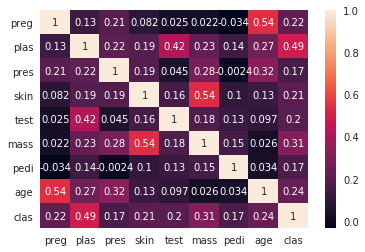

In [9]:
co = df.corr()
sns.heatmap(co, annot=True)

El resultado de la tabla muestra 3 correlaciones que son las mas representativas, las cuales mostraremos en diferentes graficos.

Ploteamos un histograma que contrasta la correlacion entre una persona diabetica y la glucosa en la sangre, donde se compara las personas diabeticas con las personas no diabeticas. 

/home/dahaka/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


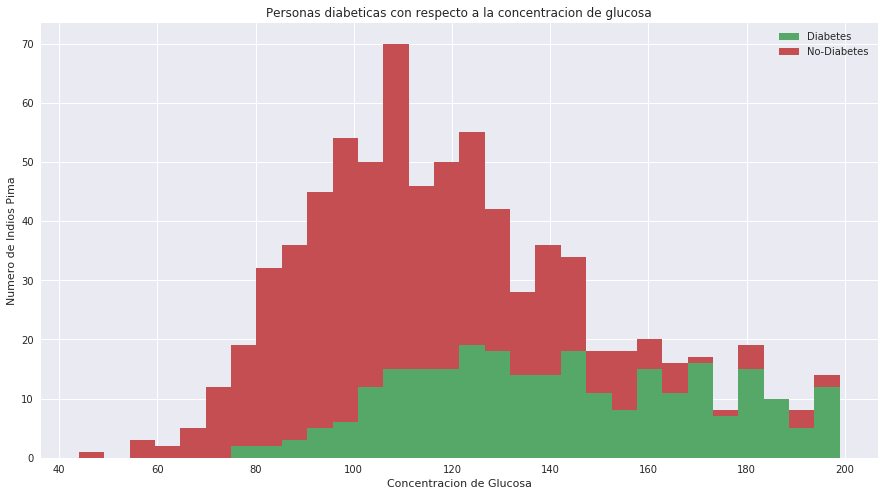

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['clas']==1]['plas'],df[df['clas']==0]['plas']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Diabetes','No-Diabetes'])
plt.title('Personas diabeticas con respecto a la concentracion de glucosa')
plt.xlabel('Concentracion de Glucosa')
plt.ylabel('Numero de Indios Pima')
plt.legend()

Los datos con mejor correlacion fue mass con skin, como ambas son caracteristicas caracteristicas lo visualizamos con una plot de scatter para observar su tendencia

Text(0,0.5,u'Body mass index (weight in kg/(height in m)^2) ')

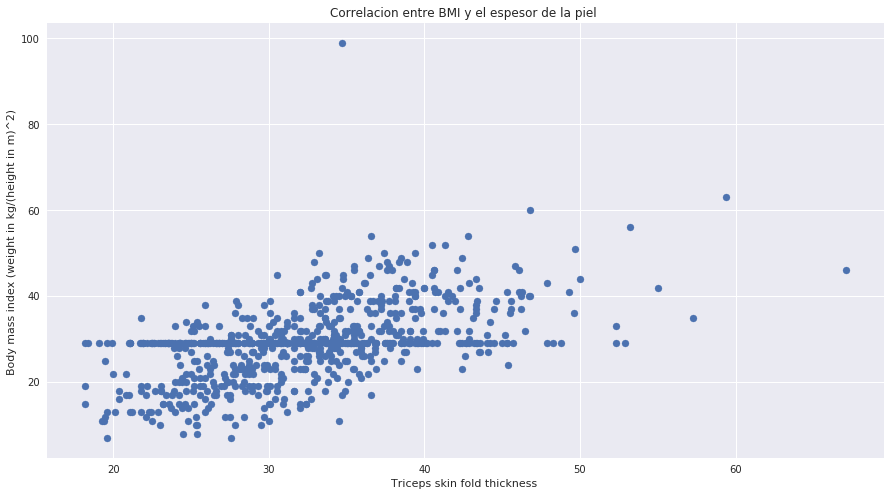

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(df['mass'],df['skin'])
plt.title('Correlacion entre BMI y el espesor de la piel ')
plt.xlabel('Triceps skin fold thickness ')
plt.ylabel('Body mass index (weight in kg/(height in m)^2) ')

Text(0,0.5,u'mass')

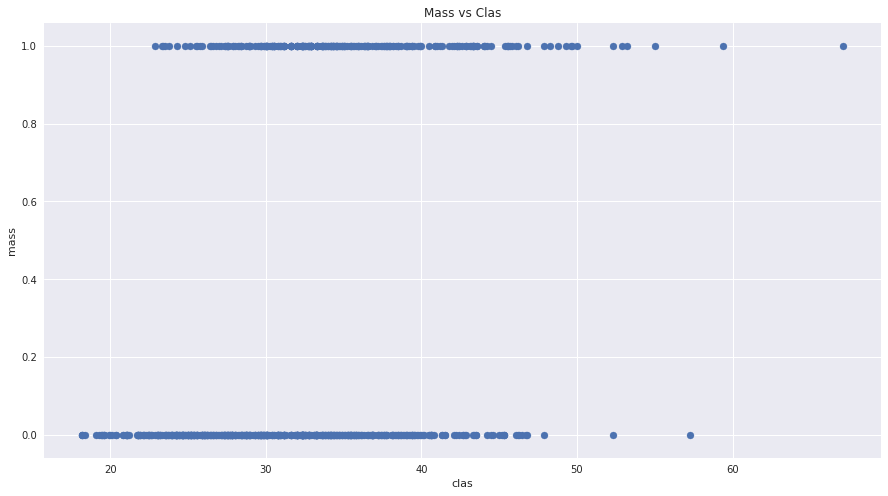

In [12]:
fig = plt.figure(figsize=(15,8)) 
ax = fig.add_subplot(1,1,1) 
ax.scatter(df['mass'],df['clas'])
plt.title('Mass vs Clas')
plt.xlabel('clas')
plt.ylabel('mass')


Como se ve en el grafico de arriba la distribucion entre los valores de 0 y 1 puede ser representada por una funcion escalonada, como es el caso del uso de la funcion sigmoidea en aplicacion a Machine Learning.

Todas las caracteristicas tienen esa misma distribucion con respecto al valor de salida ('clas'), usaremos esas correlaciones para crear un modelo predictivo

## Modelos predictivos

Creamos arreglos numpy, escalamos la variable X, por ultimo creamos las variables train y test 

In [13]:
X = np.array(df.drop('clas', axis=1))
X = StandardScaler().fit_transform(X)
y = np.array(df['clas'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Creamos una funcion que proporciona una exactitud para el modelo

In [14]:
def accuracy(model):
    kf = KFold(n_splits=5)
    crv = cross_val_score(model, X_train, y_train, cv=kf,scoring='accuracy')
   
    return crv.mean()*100

In [15]:
accuracy(LogisticRegression())

74.66116941529235

Para el modelo de Logistic Regression usamos el total de columnas, pero queremos saber las caracteristicas mas importantes para optimizar nuestro modelo

Usamos la clasificacion de arbol de desiciones, usando los valores de entrenamiento (train) para obtener las features con mayor ponderacion

In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
C = clf.feature_importances_
for i in range(len((C))):
    print(df.columns[i], ': ', C[i]*100)

('preg', ': ', 6.03968302392012)
('plas', ': ', 35.889581288125775)
('pres', ': ', 8.712403812635959)
('skin', ': ', 4.7912041474673535)
('test', ': ', 5.698890008222575)
('mass', ': ', 15.935526179048281)
('pedi', ': ', 13.7284714327218)
('age', ': ', 9.204240107858125)


Las ponderaciones de las features indica cuales son las mas influyentes en la determinacion para saber si una persona sera diabetica o no, las features con mayor ponderacion son 'plas', 'mass', 'pedi', 'age'

Esta informacion la usaremos para el modelo SVM con kernel lineal

In [17]:

X = np.array(df[['plas', 'mass', 'pedi', 'age']])
X = StandardScaler().fit_transform(X)
y = np.array(df['clas'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
accuracy(SVC(kernel='linear', C=0.1))

77.36372117819539

Vemos que la presicion del modelo SVM es mayor que la presicion del modelo Logistic Regression, elegimos pues SVM como modelo de prediccion

In [18]:
clf = SVC(kernel='linear', C=0.1)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)*100

74.02597402597402

Determinamos el arreglo de prediccion

In [19]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

Usando este arreglo determinamos un reporte que nos brinda precisiones con respecto a la veracidad de los datos

In [20]:
con = confusion_matrix(y_test, clf.predict(X_test))
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81       103
          1       0.63      0.53      0.57        51

avg / total       0.73      0.74      0.73       154



Imprimimos entonces un cuadro que determina la precision de las variables; falso negativo, falso positivo, verdadero negativo y verdadero positivo. 

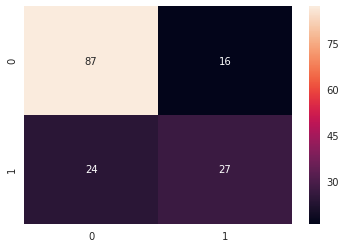

In [21]:
sns.heatmap(con, annot=True, xticklabels=[0,1], yticklabels=[0,1])

## Conclusiones

Hemos explorado, analizado y modelado la base de datos

Determinamos la correlacion entre las features, donde las que mejor correlacion tuvieron fue age y preg, mass y skin, clas plas. Esto significa que al variar una feature tienen un gran efecto en la variacion de la otra feature, lo que nos facilito la visualizacion

Encontramos que con respecto a la base de datos las personas que tienen diabetes son aproximadamente un 35% 

La tecnica de prediccion que utilizamos fue de algoritmo supervisado, en el que comparamos la exactitud de dos modelos de clasificacion, el primero fue Logistic Regression, el cual dio una exactitud aproximada de 75.53, y el modelo SVM en el que elegimos las columnas de mayor importancia que fueron; 'plas', 'mass', 'pedi', 'age', con estas columnas creamos el modelo de SVM 4-dimenasional, en el que encontramos una exactitud aproximada de 78.67. Al comparar estos dos modelos elegimos SVM por tener una mayor exactitud y lo utilizamos como modelo de prediccion

Otro metodo de comparacion entre modelos de prediccion es usando variables de veracidad de los datos, solo lo determinamos para SVM, ya que es el modelo que elegimos, sin embargo se puede extrapolar para la toma de decisiones de distintos modelos

Cabe recalcar que las caracteristicas que mas afectan a que una persona tenga diabetes son; la glucosa en la sangre, el indice de masa corporal, funcion pedigree de diabetes y la edad. Ahora viasualizaremos para el cliente como afecta cada variable en 4 graficos

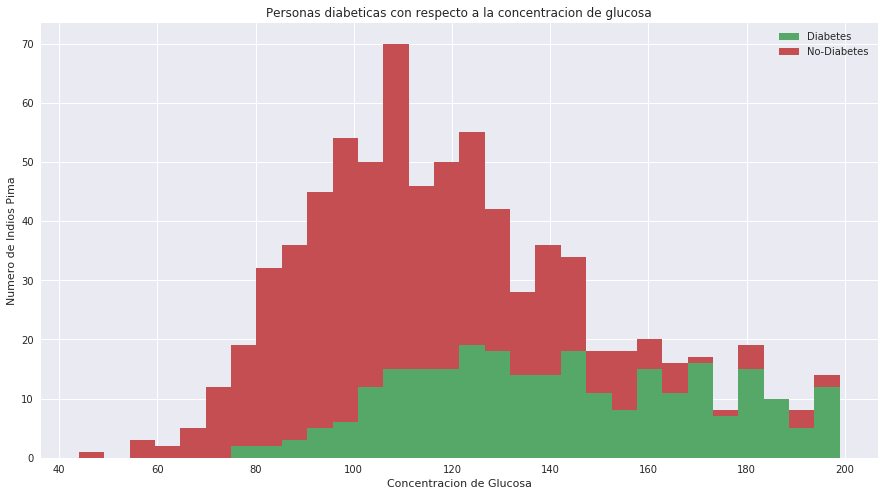

In [22]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['clas']==1]['plas'],df[df['clas']==0]['plas']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Diabetes','No-Diabetes'])
plt.title('Personas diabeticas con respecto a la concentracion de glucosa')
plt.xlabel('Concentracion de Glucosa')
plt.ylabel('Numero de Indios Pima')
plt.legend()

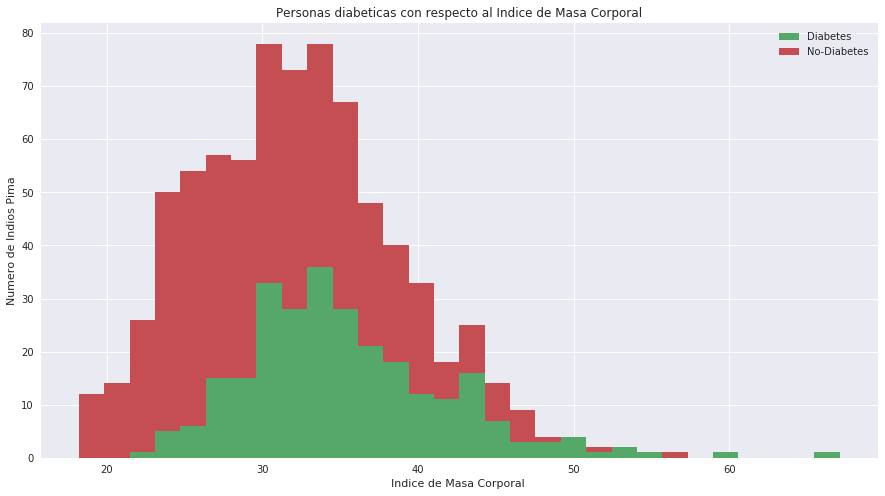

In [23]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['clas']==1]['mass'],df[df['clas']==0]['mass']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Diabetes','No-Diabetes'])
plt.title('Personas diabeticas con respecto al Indice de Masa Corporal')
plt.xlabel('Indice de Masa Corporal ')
plt.ylabel('Numero de Indios Pima')
plt.legend()

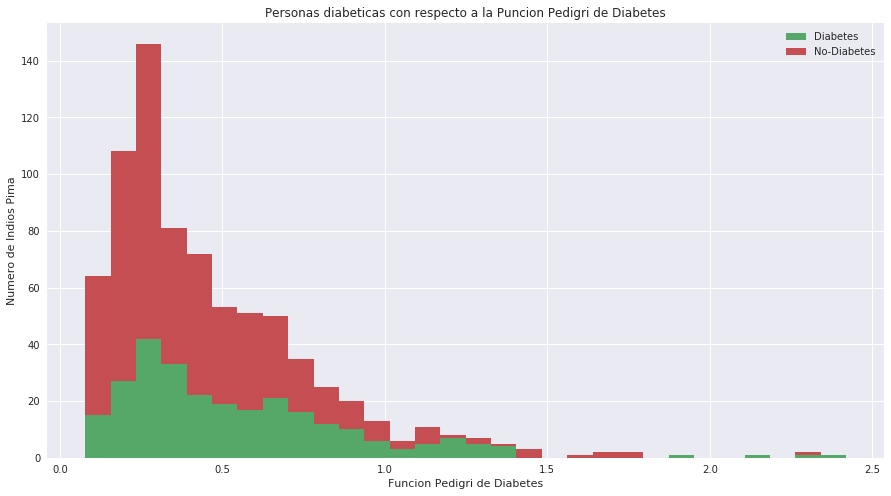

In [24]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['clas']==1]['pedi'],df[df['clas']==0]['pedi']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Diabetes','No-Diabetes'])
plt.title('Personas diabeticas con respecto a la Puncion Pedigri de Diabetes')
plt.xlabel('Funcion Pedigri de Diabetes')
plt.ylabel('Numero de Indios Pima')
plt.legend()

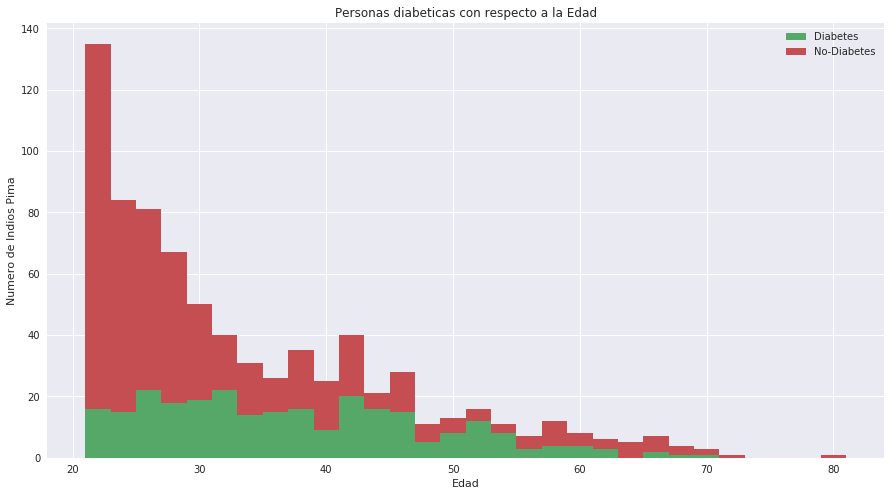

In [25]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['clas']==1]['age'],df[df['clas']==0]['age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Diabetes','No-Diabetes'])
plt.title('Personas diabeticas con respecto a la Edad')
plt.xlabel('Edad')
plt.ylabel('Numero de Indios Pima')
plt.legend()

Con los graficos de mas arriba se puede observar la distribucion y concentracion de personas que tienen diabetes y las que no tienen diabetes

Hay dos graficos donde la distribucion es no trivial por la cantidad de gente (mayor gente, implica mayor gente que tiene diabetes y mayor gente que no tiene diabetes pues afecta mucho la cantidad de personas que se estudia). El grafico de concentracion de glucosa en la sangre afecta mucho si una persona puede ser diabetica o no, esto explica la distribucion cargada a la concentracion de la glucosa. Por otra parte el grafico de edad se distribuye mas uniforme, donde los mayores peak estan en los 25, 32 y 43 años aproximadamente

Los graficos son recomendable presentar al cliente para una clara concepcion de la diabetes de las mujeres indias de Pima

## Referencias

1. https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes
2. https://www.ncbi.nlm.nihgov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf
3. http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
4. https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
5. https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/
6. https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/